In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data=pd.read_csv("../Data/Groceries_dataset.csv")

In [3]:
data.shape

(38765, 3)

In [4]:
data.head()

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

In [5]:
data.Member_number.unique

<bound method Series.unique of 0        1808
1        2552
2        2300
3        1187
4        3037
         ... 
38760    4471
38761    2022
38762    1097
38763    1510
38764    1521
Name: Member_number, Length: 38765, dtype: int64>

In [6]:
data.Date.unique

<bound method Series.unique of 0        21-07-2015
1        05-01-2015
2        19-09-2015
3        12-12-2015
4        01-02-2015
            ...    
38760    08-10-2014
38761    23-02-2014
38762    16-04-2014
38763    03-12-2014
38764    26-12-2014
Name: Date, Length: 38765, dtype: object>

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

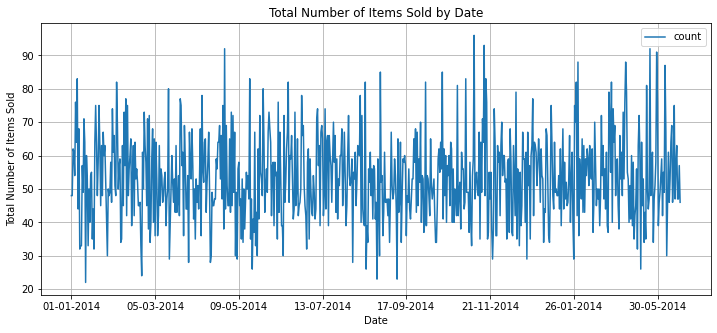

In [7]:
data.groupby(['Date'])['itemDescription'].agg(['count']).plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [8]:
data.Date = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_of_week'] = data['Date'].dt.dayofweek

In [9]:
data

Member_number       Date        itemDescription  year  month  day  \
0               1808 2015-07-21         tropical fruit  2015      7   21   
1               2552 2015-05-01             whole milk  2015      5    1   
2               2300 2015-09-19              pip fruit  2015      9   19   
3               1187 2015-12-12       other vegetables  2015     12   12   
4               3037 2015-01-02             whole milk  2015      1    2   
...              ...        ...                    ...   ...    ...  ...   
38760           4471 2014-08-10          sliced cheese  2014      8   10   
38761           2022 2014-02-23                  candy  2014      2   23   
38762           1097 2014-04-16               cake bar  2014      4   16   
38763           1510 2014-03-12  fruit/vegetable juice  2014      3   12   
38764           1521 2014-12-26               cat food  2014     12   26   

       day_of_week  
0                1  
1                4  
2                5  
3                5  
4                4  
...            ...  
38760            6  
38761            6  
38762            2  
38763            2  
38764            4  

[38765 rows x 7 columns]

C:\Users\Notebook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


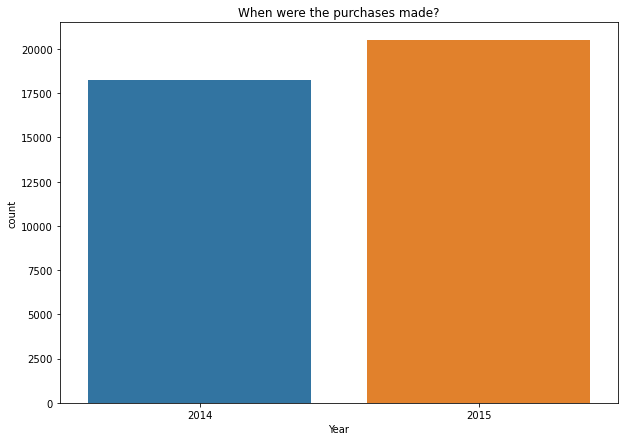

In [10]:

plt.figure(figsize=(10,7))
sns.countplot(data['Date'].apply(lambda x: x.year))
plt.title('When were the purchases made?')
plt.xlabel('Year')
plt.show()


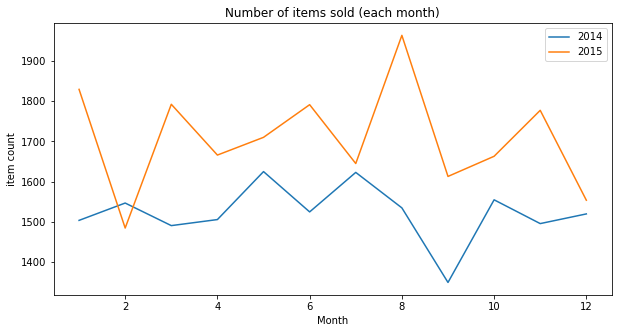

In [11]:
df3 = data.copy()
df3['Year'] = data['Date'].apply(lambda x: x.year)
df3['Month'] = data['Date'].apply(lambda x: x.month)
df3.drop(['Member_number','Date'],axis=1,inplace=True)
df3 = df3.groupby(['Year','Month']).count().reset_index()



d_2014 = df3[df3['Year'] == 2014]
d_2015 = df3[df3['Year'] == 2015]


plt.figure(figsize=(10,5))
plt.plot(d_2014['Month'],d_2014['itemDescription'],label='2014')
plt.plot(d_2015['Month'],d_2015['itemDescription'],label='2015')
plt.title('Number of items sold (each month)')
plt.xlabel('Month')
plt.ylabel('item count')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Best Sellers')

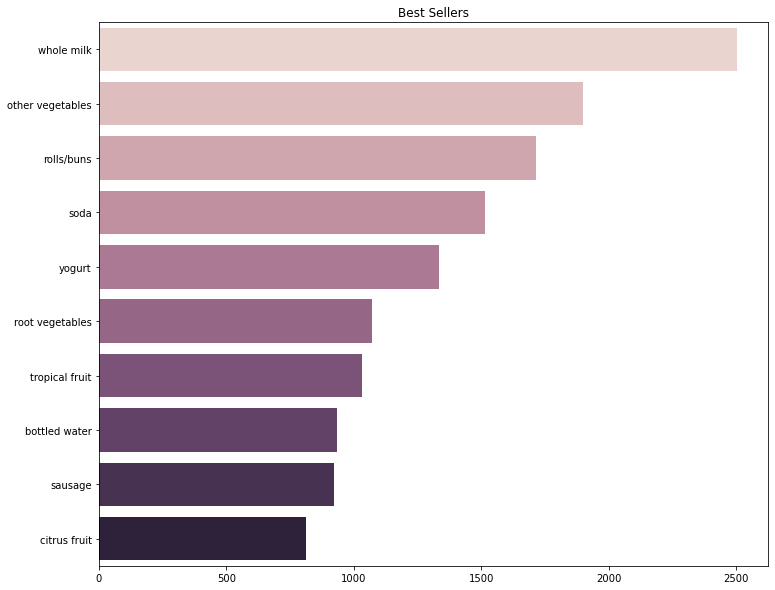

In [12]:
x = list(data['itemDescription'].value_counts()[:10].values)
y = list(data['itemDescription'].value_counts()[:10].index)

plt.figure(figsize=(12,10))
ax=sns.barplot(x=x,y=y, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers')

Text(0.5, 1.0, 'Least Sellers')

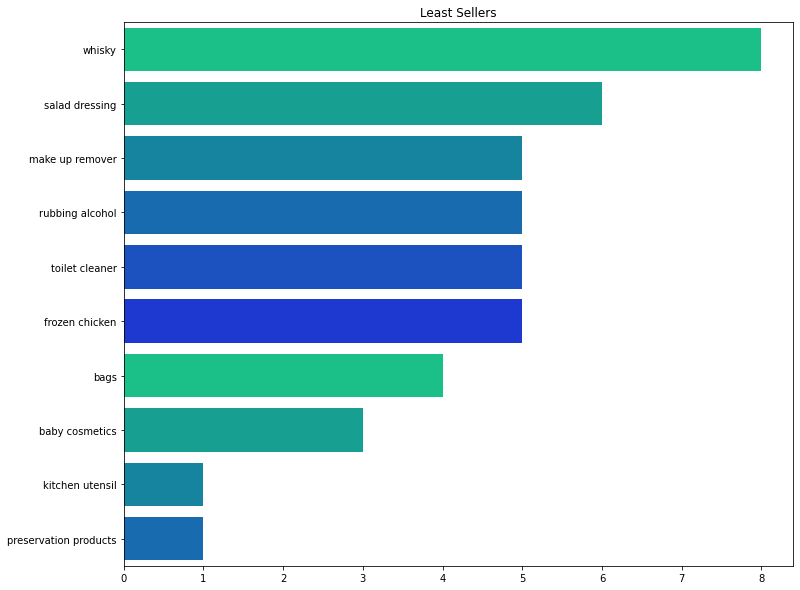

In [13]:
x = list(data['itemDescription'].value_counts()[-10:].values)
y = list(data['itemDescription'].value_counts()[-10:].index)

plt.figure(figsize=(12,10))
ax=sns.barplot(x=x,y=y, palette=sns.color_palette("winter_r"))
plt.title('Least Sellers')

(-0.5, 511.5, 383.5, -0.5)

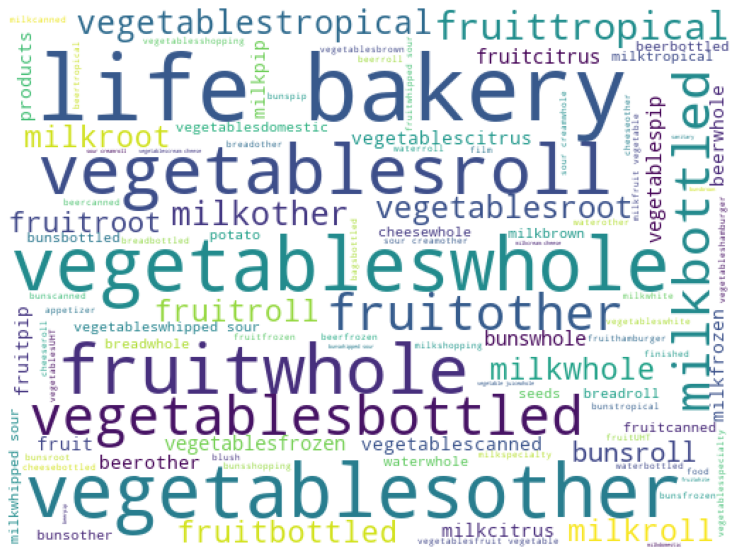

In [14]:
from wordcloud import WordCloud

plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color = 'white',
                     width=512,
                     height=384,
                     max_words=100).generate("".join(data['itemDescription']))

plt.imshow(wordcloud)
plt.axis('off')

In [15]:
d=data.set_index(['Date'])
d.index=pd.to_datetime(d.index)
d

Member_number        itemDescription  year  month  day  \
Date                                                                 
2015-07-21           1808         tropical fruit  2015      7   21   
2015-05-01           2552             whole milk  2015      5    1   
2015-09-19           2300              pip fruit  2015      9   19   
2015-12-12           1187       other vegetables  2015     12   12   
2015-01-02           3037             whole milk  2015      1    2   
...                   ...                    ...   ...    ...  ...   
2014-08-10           4471          sliced cheese  2014      8   10   
2014-02-23           2022                  candy  2014      2   23   
2014-04-16           1097               cake bar  2014      4   16   
2014-03-12           1510  fruit/vegetable juice  2014      3   12   
2014-12-26           1521               cat food  2014     12   26   

            day_of_week  
Date                     
2015-07-21            1  
2015-05-01            4  
2015-09-19            5  
2015-12-12            5  
2015-01-02            4  
...                 ...  
2014-08-10            6  
2014-02-23            6  
2014-04-16            2  
2014-03-12            2  
2014-12-26            4  

[38765 rows x 6 columns]

In [16]:
d["Hour"] = d.index.hour
d["Weekday"] = d.index.weekday + 1

d.head(10)

Member_number   itemDescription  year  month  day  day_of_week  \
Date                                                                         
2015-07-21           1808    tropical fruit  2015      7   21            1   
2015-05-01           2552        whole milk  2015      5    1            4   
2015-09-19           2300         pip fruit  2015      9   19            5   
2015-12-12           1187  other vegetables  2015     12   12            5   
2015-01-02           3037        whole milk  2015      1    2            4   
2015-02-14           4941        rolls/buns  2015      2   14            5   
2015-08-05           4501  other vegetables  2015      8    5            2   
2015-12-23           3803        pot plants  2015     12   23            2   
2015-03-20           2762        whole milk  2015      3   20            4   
2015-12-02           4119    tropical fruit  2015     12    2            2   

            Hour  Weekday  
Date                       
2015-07-21     0        2  
2015-05-01     0        5  
2015-09-19     0        6  
2015-12-12     0        6  
2015-01-02     0        5  
2015-02-14     0        6  
2015-08-05     0        3  
2015-12-23     0        3  
2015-03-20     0        5  
2015-12-02     0        3

In [17]:
gunluk_satis = d.groupby(["Weekday"])["itemDescription"].agg(["count"]).reset_index()
gunluk_satis.sort_values("Weekday",ascending = True)

Weekday  count
0        1   5299
1        2   5524
2        3   5663
3        4   5754
4        5   5504
5        6   5397
6        7   5624

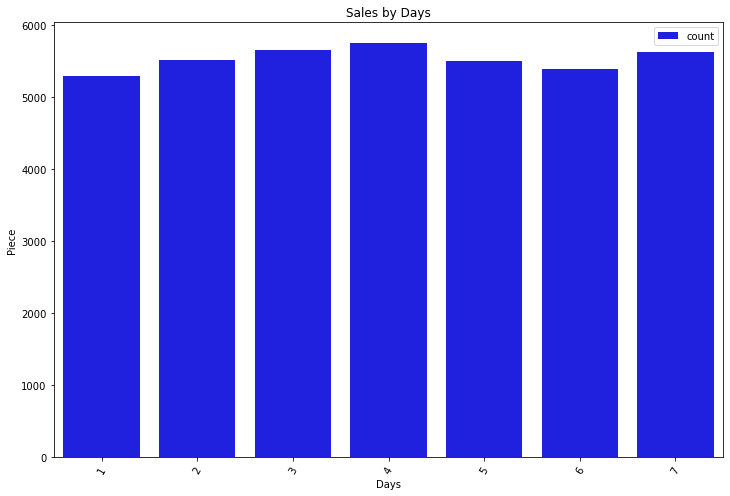

In [18]:
plt.figure(figsize = (12,8))
sns.barplot(x ="Weekday", y ="count",data = gunluk_satis,color = "Blue",label = "count")
plt.xlabel("Days")
plt.ylabel("Piece")
plt.title("Sales by Days")
plt.xticks(rotation = 60)
plt.legend()
plt.show()

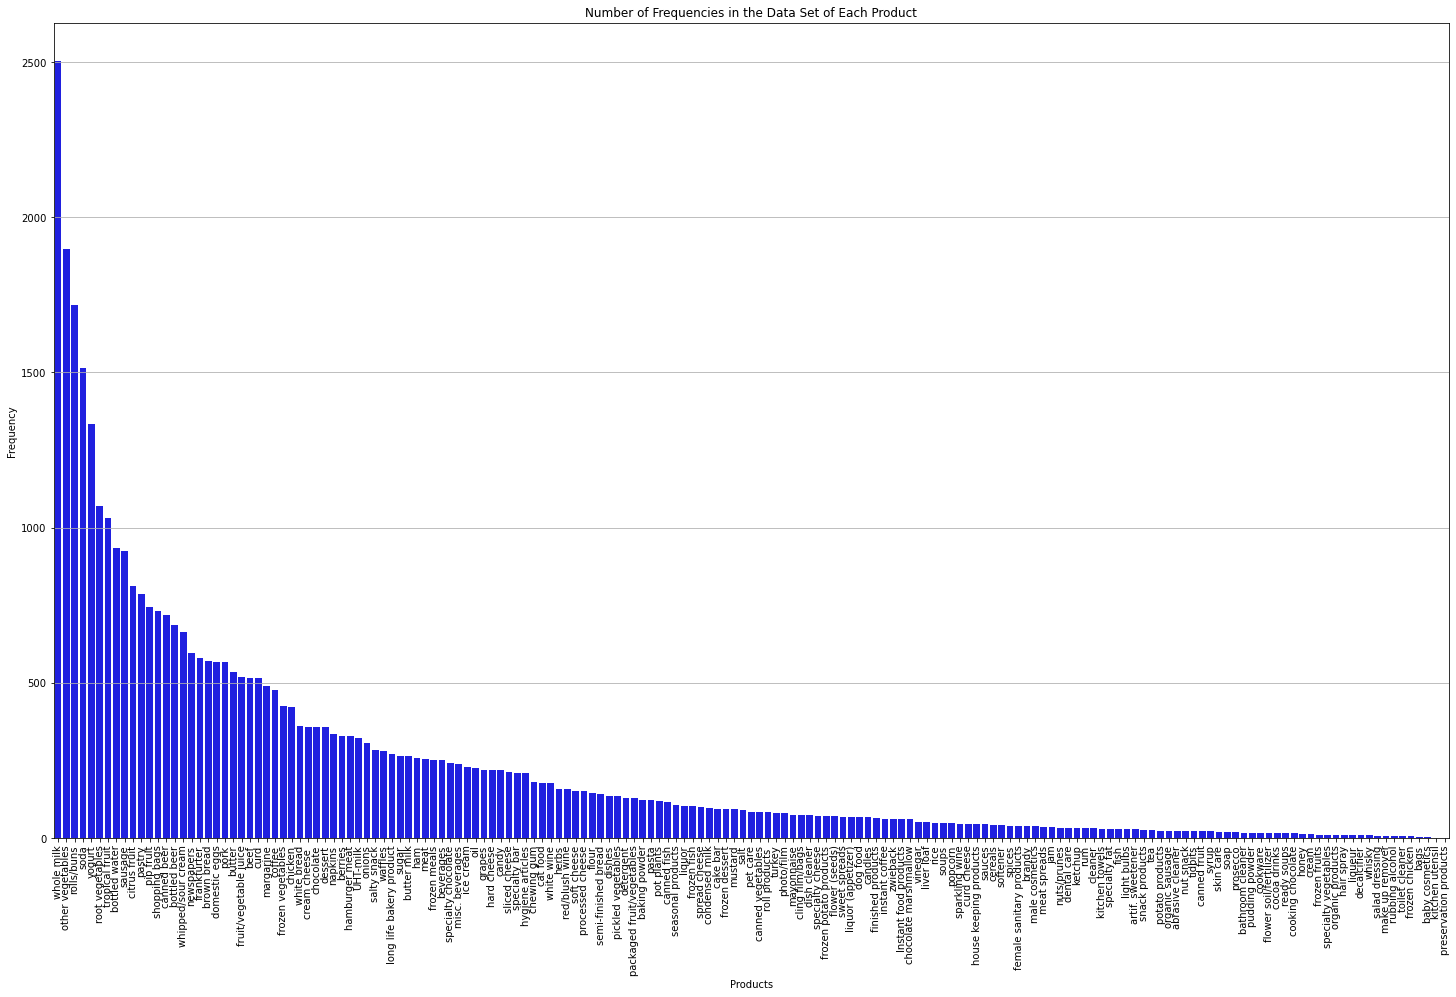

In [19]:
# Frequencies of Products
plt.figure(figsize = (25,15))
plt.grid()
sns.barplot(x = data.itemDescription.value_counts().keys(),y = data.itemDescription.value_counts().values,color="Blue")
plt.title("Number of Frequencies in the Data Set of Each Product")
plt.xlabel("Products")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [20]:
total_items = len(d)
total_days = len(np.unique(d.index.date))
total_months = len(np.unique(d.index.month))
average_items = total_items / total_days
unique_items = d.itemDescription.unique().size

print("There are {} unique items sold ".format(unique_items))
print("Total {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print("With an average of {} items sold daily".format(average_items))

There are 167 unique items sold 
Total 38765 items sold in 728 days throughout 12 months
With an average of 53.24862637362637 items sold daily


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

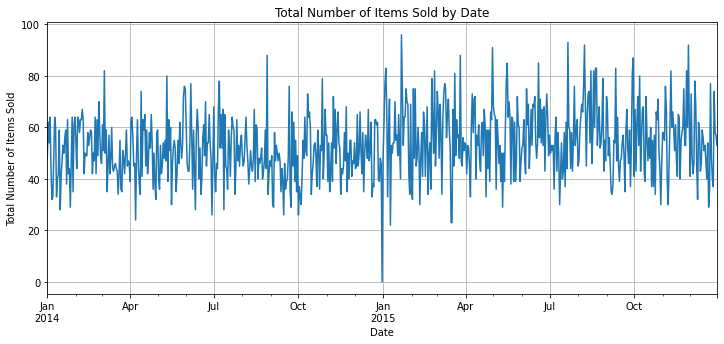

In [21]:
d.resample("D")['itemDescription'].count().plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

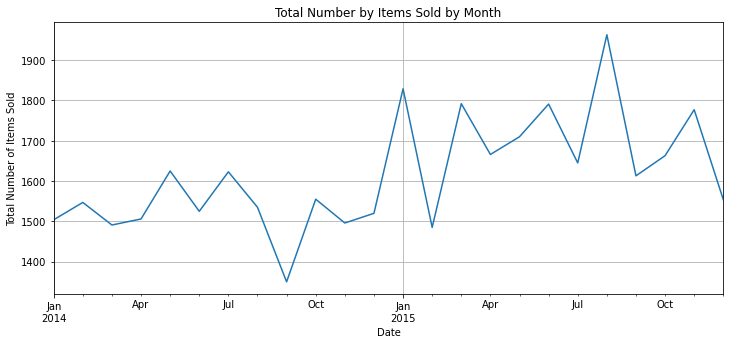

In [22]:
d.resample("M")['itemDescription'].count().plot(figsize=(12,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [23]:
data['Date'].nunique()

728

In [24]:
data['Member_number'].nunique()

3898

In [25]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [26]:
# !pip install plotly

In [27]:
df=data.groupby(['Member_number','Date'])['itemDescription'].apply(sum)
df

Member_number  Date      
1000           2014-06-24                   whole milkpastrysalty snack
               2015-03-15    sausagewhole milksemi-finished breadyogurt
               2015-05-27                        sodapickled vegetables
               2015-07-24                    canned beermisc. beverages
               2015-11-25                       sausagehygiene articles
                                                ...                    
4999           2015-05-16                 butter milkwhipped/sour cream
               2015-12-26                            bottled waterherbs
5000           2014-09-03                   fruit/vegetable juiceonions
               2014-11-16                  bottled beerother vegetables
               2015-10-02        sodaroot vegetablessemi-finished bread
Name: itemDescription, Length: 14963, dtype: object

In [28]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-28-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [29]:
transactions = [a[1]['itemDescription'].tolist() for a in list(data.groupby(['Member_number','Date']))]

In [30]:
dff = pd.DataFrame(transactions)
dff.head()

0                   1                    2       3     4     5   \
0  whole milk   pastry              salty snack          None    None  None   
1  sausage      whole milk          semi-finished bread  yogurt  None  None   
2  soda         pickled vegetables  None                 None    None  None   
3  canned beer  misc. beverages     None                 None    None  None   
4  sausage      hygiene articles    None                 None    None  None   

     6     7     8     9     10  
0  None  None  None  None  None  
1  None  None  None  None  None  
2  None  None  None  None  None  
3  None  None  None  None  None  
4  None  None  None  None  None

In [31]:
dff.to_csv('../Data/basket.csv',index=False)

In [33]:
data.to_csv('../Data/Groceries data.csv',index=False)